In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))
#
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
pd.set_option('display.max_colwidth', None)


In [6]:
from wordcloud import WordCloud

In [7]:
import glob

In [8]:
import squarify

In [9]:
articles = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv")
customers = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv")
transactions = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

In [10]:
articles['article_id'].count()

105542

In [11]:
columns = articles.columns
print(columns)

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')


In [12]:
product_count = articles.groupby(['product_type_name', 'prod_name']).size().reset_index(name='count')
product_count_sorted = product_count.sort_values('count', ascending=False)
print(product_count_sorted)




      product_type_name              prod_name  count
8946              Dress        Dragonfly dress     98
36525           T-shirt               Mike tee     72
37323           T-shirt   Wow printed tee 6.99     70
29705             Socks                1pk Fun     55
33796           Sweater  TP Paddington Sweater     54
...                 ...                    ...    ...
19590            Jacket              Wolf coat      1
19589            Jacket             Wolf biker      1
19587            Jacket              Wolf Coat      1
19586            Jacket           Windy Jacket      1
46790       Zipper head  TC - ZIPPER PLASTIC L      1

[46791 rows x 3 columns]


In [13]:
product_count_2 = articles.groupby(['index_group_name', 'index_name']).size().reset_index(name='count')
product_count_2_sorted = product_count_2.sort_values(['index_group_name','count'], ascending=False)
print(product_count_2_sorted)

  index_group_name                      index_name  count
9            Sport                           Sport   3392
8         Menswear                        Menswear  12553
6       Ladieswear                      Ladieswear  26001
5       Ladieswear              Ladies Accessories   6961
7       Ladieswear                Lingeries/Tights   6775
4          Divided                         Divided  15149
3    Baby/Children           Children Sizes 92-140  12007
2    Baby/Children          Children Sizes 134-170   9214
0    Baby/Children                Baby Sizes 50-98   8875
1    Baby/Children  Children Accessories, Swimwear   4615


In [14]:
# null data analysis
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [15]:
## Unique value analysis:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

In [16]:
def count_null_unique_total_values(data):
    null_counts = data.isnull().sum()
    unique_counts = data.nunique()
    total_counts = data.shape[0]
    null_percentage = (null_counts / total_counts) * 100
    df = pd.DataFrame({'Null_Count': null_counts, 'Null_percentage' : null_percentage,'Unique_Count': unique_counts, 'Total_Count': total_counts})
    #df['percent_null_count'] = ('Null_Count'/'Total_Count')
    return df

In [17]:
count_null_unique_total_values(articles)

,Null_Count,Null_percentage,Unique_Count,Total_Count
article_id,0,0.000000,105542,105542
product_code,0,0.000000,47224,105542
prod_name,0,0.000000,45875,105542
product_type_no,0,0.000000,132,105542
product_type_name,0,0.000000,131,105542
product_group_name,0,0.000000,19,105542
graphical_appearance_no,0,0.000000,30,105542
graphical_appearance_name,0,0.000000,30,105542
colour_group_code,0,0.000000,50,105542
colour_group_name,0,0.000000,50,105542


In [18]:
group_counts = articles.groupby('product_group_name')['prod_name'].nunique().reset_index().rename(columns={'prod_name': 'Unique_Count'}).sort_values('Unique_Count', ascending=False)
group_counts

#group_counts
#group_counts

,product_group_name,Unique_Count
7,Garment Upper body,16896
6,Garment Lower body,8466
5,Garment Full body,6751
0,Accessories,6192
12,Shoes,2640
16,Underwear,2201
15,Swimwear,1390
13,Socks & Tights,791
11,Nightwear,744
18,Unknown,67


In [19]:
group_counts_articles = articles.groupby('product_group_name')['article_id'].nunique().reset_index().rename(columns={'article_id':
'Count'}).sort_values('Count', ascending=False)

In [73]:
prod_name_count = articles.groupby('prod_name')['article_id'].nunique().reset_index().rename(columns={'article_id':
'Count'}).sort_values('Count', ascending=False)

In [74]:
prod_name_count

,prod_name,Count
12399,Dragonfly dress,98
28001,Mike tee,72
45177,Wow printed tee 6.99,70
183,1pk Fun,55
41803,TP Paddington Sweater,54
...,...,...
19660,Iaa skirt,1
19653,IZZY Tee Fancy,1
19649,IZZY KNOT LOOSE TEE+,1
19647,IZZY,1


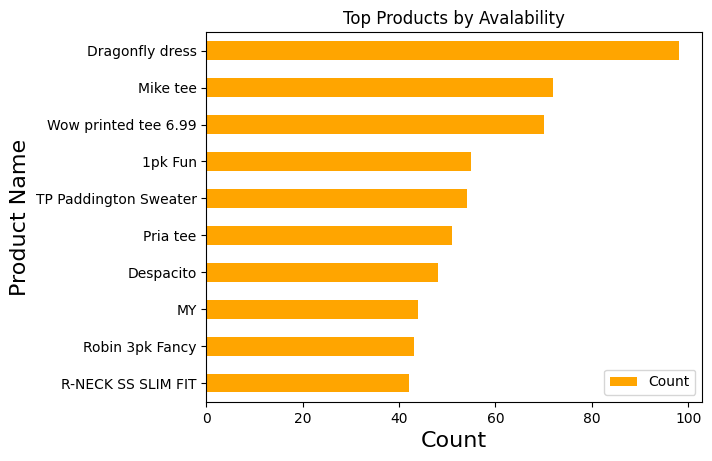

In [76]:
prod_name_count_top_10 = prod_name_count.head(10)
prod_name_count_top_10 = prod_name_count_top_10.sort_values('Count', ascending=True)
prod_name_count_top_10.plot.barh(y='Count', x='prod_name', color='orange')
plt.xlabel('Count', fontsize=16)
plt.ylabel('Product Name', fontsize=16)
plt.title('Top Products by Avalability')
#ax.tick_params(axis='y', labelsize=18)
plt.show()

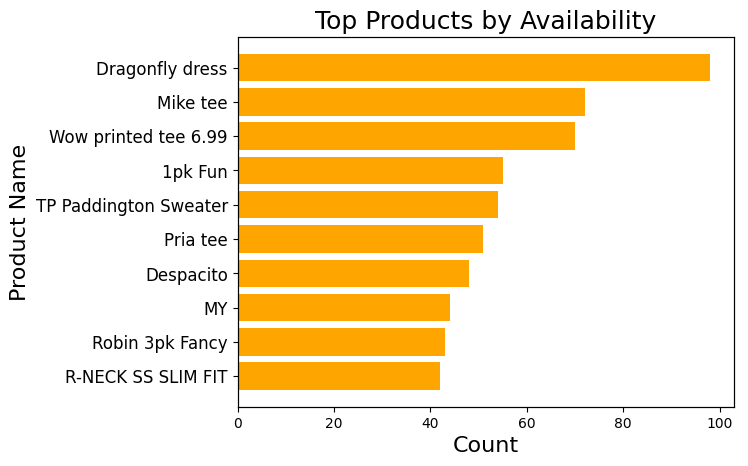

In [77]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.barh(prod_name_count_top_10['prod_name'], prod_name_count_top_10['Count'], color='orange')
ax1.set_xlabel('Count', fontsize=16)
ax1.set_ylabel('Product Name', fontsize=16)
ax1.set_title('Top Products by Availability', fontsize=18)
ax1.tick_params(axis='y', labelrotation=0, labelsize=12)

ax2.set_ylim(ax1.get_ylim())
ax2.set_yticks([])
ax2.set_ylabel('')

plt.show()

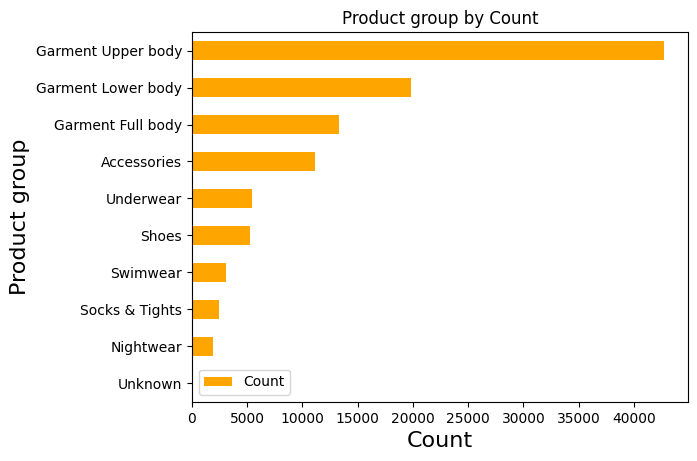

In [21]:

group_counts_top_10 = group_counts_articles.head(10)
group_counts_top_10 = group_counts_top_10.sort_values('Count', ascending=True)
group_counts_top_10.plot.barh(y='Count', x='product_group_name', color='orange')
plt.xlabel('Count', fontsize=16)
plt.ylabel('Product group', fontsize=16)
plt.title('Product group by Count')
#ax.tick_params(axis='y', labelsize=18)
plt.show()

In [22]:
# Filter the top 5 product group names
top_product_groups = group_counts.head(5)['product_group_name'].tolist()

# Filter the corresponding product names
filtered_data = articles.loc[articles['product_group_name'].isin(top_product_groups), 'prod_name']

# Count the occurrences of each product name
product_counts = filtered_data.value_counts().reset_index()
product_counts.columns = ['prod_name', 'count']
sorted_product_counts = product_counts.sort_values('count', ascending=False).head(10)
top_10_products = sorted_product_counts.sort_values('count', ascending=True)

In [23]:
top_10_products

,prod_name,count
12,V-NECK SS SLIM FIT,41
7,DANTE set,42
8,R-NECK SS SLIM FIT,42
6,MY,44
5,Despacito,48
4,Pria tee,51
3,TP Paddington Sweater,54
2,Wow printed tee 6.99,70
1,Mike tee,72
0,Dragonfly dress,98


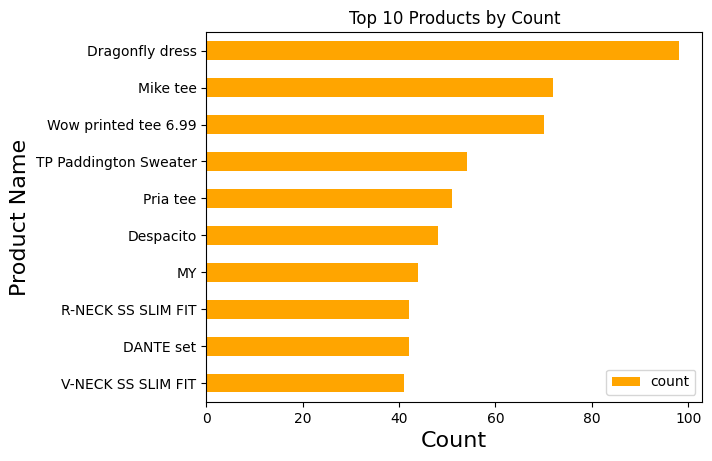

In [24]:
top_10_products.plot.barh(y='count', x='prod_name', color='orange')
plt.xlabel('Count', fontsize=16)
plt.ylabel('Product Name', fontsize=16)
plt.title('Top 10 Products by Count')
#ax.tick_params(axis='y', labelsize=18)
plt.show()

In [25]:
color_counts_articles = articles.groupby('colour_group_name')['article_id'].nunique().reset_index().rename(columns={'article_id':
'Count'}).sort_values('Count', ascending=False)
color_counts_articles

,colour_group_name,Count
1,Black,22670
5,Dark Blue,12171
47,White,9542
24,Light Pink,5811
17,Grey,4487
19,Light Beige,3356
2,Blue,3308
42,Red,3056
20,Light Blue,3012
16,Greenish Khaki,2767


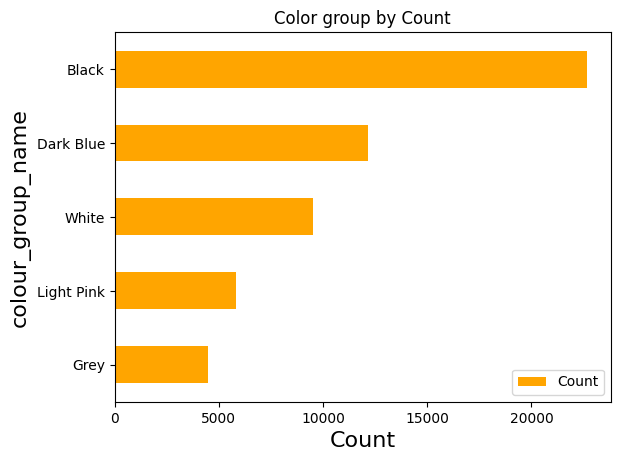

In [26]:

color_top_5 = color_counts_articles.head(5)
color_top_5 = color_top_5.sort_values('Count', ascending=True)
color_top_5.plot.barh(y='Count', x='colour_group_name', color='orange')
plt.xlabel('Count', fontsize=16)
plt.ylabel('colour_group_name', fontsize=16)
plt.title('Color group by Count')
#ax.tick_params(axis='y', labelsize=18)
plt.show()

### Customers Table

In [27]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [28]:
customers[['FN']]
# Replace NAN with 0 (zero)

,FN
0,NaN
1,NaN
2,NaN
3,NaN
4,1.0
...,...
1371975,NaN
1371976,NaN
1371977,1.0
1371978,1.0


In [29]:
count_null_unique_total_values(customers)

,Null_Count,Null_percentage,Unique_Count,Total_Count
customer_id,0,0.000000,1371980,1371980
FN,895050,65.237831,1,1371980
Active,907576,66.150819,1,1371980
club_member_status,6062,0.441843,3,1371980
fashion_news_frequency,16009,1.166854,4,1371980
age,15861,1.156066,84,1371980
postal_code,0,0.000000,352899,1371980


In [30]:
# Range of Age
#FN ?
# active?
# range of fashion_news_frequency

In [31]:
columns = ['FN','Active', 'club_member_status','fashion_news_frequency']
for column in columns:
    unique_values = customers[column].unique()
    print(f"Unique values in column '{column}':")
    for value in unique_values:
        print(value)
    print()

Unique values in column 'FN':
nan
1.0

Unique values in column 'Active':
nan
1.0

Unique values in column 'club_member_status':
ACTIVE
nan
PRE-CREATE
LEFT CLUB

Unique values in column 'fashion_news_frequency':
NONE
Regularly
nan
Monthly
None



In [32]:
columns = ['FN','Active', 'club_member_status','fashion_news_frequency']
for column in columns:
    unique_values = customers[column].unique()
    value_counts = customers[column].value_counts()
    
    print(f"Unique values in column '{column}':")
    for value in unique_values:
        print(value)
    
    print(f"\nValue counts in column '{column}':")
    print(value_counts)
    
    print()  # Print an empty line to separate the output of each column


Unique values in column 'FN':
nan
1.0

Value counts in column 'FN':
1.0    476930
Name: FN, dtype: int64

Unique values in column 'Active':
nan
1.0

Value counts in column 'Active':
1.0    464404
Name: Active, dtype: int64

Unique values in column 'club_member_status':
ACTIVE
nan
PRE-CREATE
LEFT CLUB

Value counts in column 'club_member_status':
ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

Unique values in column 'fashion_news_frequency':
NONE
Regularly
nan
Monthly
None

Value counts in column 'fashion_news_frequency':
NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64



In [33]:
## outliers 
## club_member_status = 'LEFT CLUB' nan = 


In [34]:


column_min = customers['age'].min()
column_max = customers['age'].max()

column_range = column_max - column_min

print(f"Range of column Age : {column_range}")
print(f"Max Age : {column_max}")
print(f"Min : {column_min}")

Range of column Age : 83.0
Max Age : 99.0
Min : 16.0


In [88]:


column_min = (transactions['price'].min())*1000
column_max = (transactions['price'].max())*1000

column_range = column_max - column_min

print(f"Range of column Age : {column_range}")
print(f"Max Age : {column_max}")
print(f"Min : {column_min}")

Range of column Age : 591.5084745762712
Max Age : 591.5254237288135
Min : 0.01694915254237288


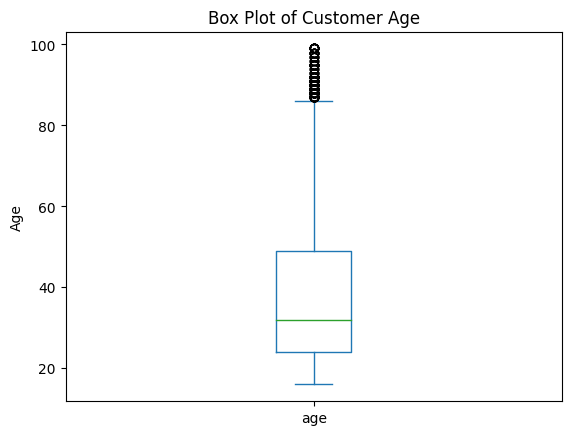

In [35]:
customers['age'].plot.box()
plt.ylabel('Age')
plt.title('Box Plot of Customer Age')
#plt.yticks(list(plt.yticks()[0]) + customers['age'].tolist())

plt.show()

In [36]:
Q1 = customers['age'].quantile(0.25)
Q3 = customers['age'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers based on the IQR
filtered_df = customers[(customers['age'] == 99)]

In [37]:
max(filtered_df['age'])

99.0

In [38]:
filtered_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
191659,23b7e974d88a6373ba0e02fd39b1a048dec0ac8a9b4ed0924003803ed5e1f694,NaN,NaN,ACTIVE,NONE,99.0,4cae8633de56064a17826b7da3feb760f2c152a93164d1c8125ec286dbc71a0c
232150,2b5284f19d272d7b7f1006289566076d72a7f097feb03f5c3e03ab39aa5bcc36,NaN,NaN,ACTIVE,NONE,99.0,8321392df5bfee24de6920492d8c9810f4bd422d0a527eaf3c1d87375e0cd611
293547,36d219eb822d04d07e5bb31e39caffefc17da81ff4a19bad55677be1490c48f9,NaN,NaN,ACTIVE,NONE,99.0,f311586e9c31b08f5ce65697ee301e69598305fc52da650bbeebeccf497bb450
307448,39719241efb3559eca60886d58f0fe01cbf8d5efea0e259a383ef6ba5d4c521d,1.0,1.0,ACTIVE,Regularly,99.0,2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c
316525,3b28156770e0a17436b29831e41394528f74b4ec2c37d31c4e05a157071ab3ff,NaN,NaN,ACTIVE,NONE,99.0,1cbcd2b9e629689467550c80de3e55871f95203c0e51227ffd96fdadea9d94ca
318986,3b9ec1854ba779c3c11389985299e642b5779947ff839553b4d2f7ddfd09ec6c,1.0,1.0,ACTIVE,Regularly,99.0,2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c
559892,687c675e64e5f5d962c99ebf915da230be8c907a65a1d512984a339575e5da9f,NaN,NaN,PRE-CREATE,NONE,99.0,7d2ef4ec3ff9ea93c8ededd7d52682074cc54ef2b5e2ed82b25e94e830e8db37
628882,7558adbc0401acdd74a7c8633ad97d25979e9859b8abca2890a4daf8f6cdc22b,NaN,NaN,ACTIVE,NONE,99.0,f85c74e22df88aabb6a0e46a285141267a5c2abaa089d8ff3292bc81330c81de
857736,a01bd2e0e8bbf8db61f0e623a05325cde84955a37415b70e9358396df4198578,1.0,1.0,ACTIVE,Regularly,99.0,07d2fb8ade29c606753e4b39daa7279539139dd69ed9931fe900fcfb92ce004c
860989,a0b9e2473f699821b72833824a3e95972862039a49c5e9de398a16c038b06da2,NaN,NaN,PRE-CREATE,NONE,99.0,19aa791d9d42fdad8c761d53c91c1f58b4a76d81213e4954f68928f75ea1ada7


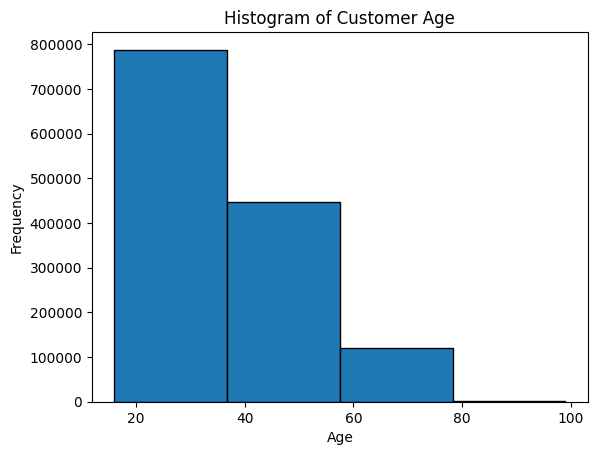

In [39]:
age_range = customers['age'].max() - customers['age'].min()
num_bins = int(age_range / 20)  # Calculate the number of bins

plt.hist(customers['age'], bins=num_bins, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Customer Age')
plt.show()

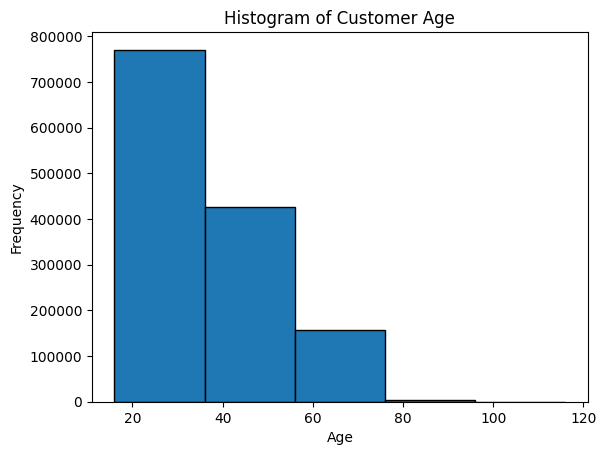

In [40]:
age_values = customers['age']
bin_width = 20
last_bin_width = 2

# Calculate the number of full bins
num_full_bins = int((age_values.max() - age_values.min()) / bin_width)

# Calculate the range of the last partial bin
last_bin_range = age_values.max() % bin_width

# Create the histogram bins
bins = np.arange(age_values.min(), age_values.min() + num_full_bins * bin_width + last_bin_range + last_bin_width, bin_width)

# Plot the histogram
plt.hist(age_values, bins=bins, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Customer Age')
plt.show()

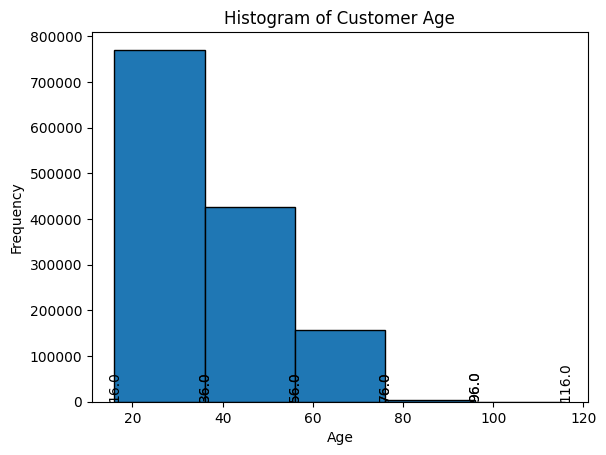

In [41]:
import numpy as np
import matplotlib.pyplot as plt

age_values = customers['age']
bin_width = 20
last_bin_width = 2

# Calculate the number of full bins
num_full_bins = int((age_values.max() - age_values.min()) / bin_width)

# Calculate the range of the last partial bin
last_bin_range = age_values.max() % bin_width

# Create the histogram bins
bins = np.arange(age_values.min(), age_values.min() + num_full_bins * bin_width + last_bin_range + last_bin_width, bin_width)

# Plot the histogram
plt.hist(age_values, bins=bins, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Customer Age')

# Add bin start and end values as text annotations
for i in range(len(bins) - 1):
    plt.text(bins[i], 0, str(bins[i]), rotation=90, va='bottom', ha='center')
    plt.text(bins[i + 1], 0, str(bins[i + 1]), rotation=90, va='bottom', ha='center')

plt.show()


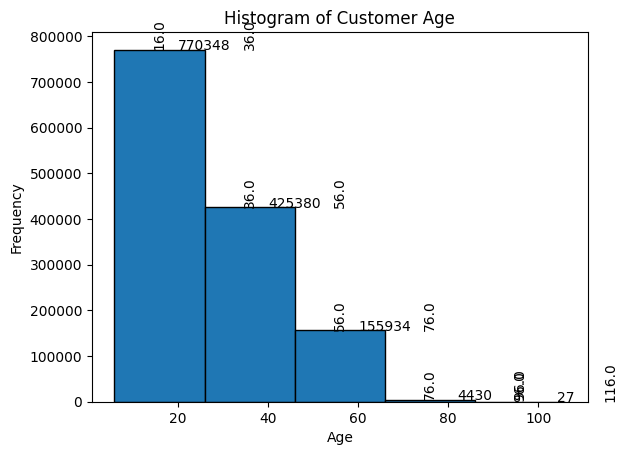

In [42]:
import numpy as np
import matplotlib.pyplot as plt

age_values = customers['age']
bin_width = 20
last_bin_width = 2

# Calculate the number of full bins
num_full_bins = int((age_values.max() - age_values.min()) / bin_width)

# Calculate the range of the last partial bin
last_bin_range = age_values.max() % bin_width

# Create the histogram bins
bins = np.arange(age_values.min(), age_values.min() + num_full_bins * bin_width + last_bin_range + last_bin_width, bin_width)

# Calculate the histogram counts
hist_counts, _ = np.histogram(age_values, bins=bins)

# Plot the histogram
plt.bar(bins[:-1], hist_counts, width=bin_width, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Customer Age')

# Add bin start, end, and frequency as text annotations
for i in range(len(bins) - 1):
    plt.text(bins[i], hist_counts[i], str(bins[i]), rotation=90, va='bottom', ha='center')
    plt.text(bins[i + 1], hist_counts[i], str(bins[i + 1]), rotation=90, va='bottom', ha='center')
    plt.text(bins[i] + bin_width / 2, hist_counts[i], str(hist_counts[i]), ha='center')

plt.show()


In [43]:
#Outliers of the customers table
## age > 96 is the outliers = 27 count = 0.002%
## left club = 467/ 1371980 = 0.035%

print((467*100/ 1371980), (2700/1371980))



0.03403839706118165 0.001967958716599367


### Transactions data

In [44]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,685687004,0.016932,2


In [45]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [46]:
# Get data
top_sold_products = transactions["article_id"].value_counts().reset_index().head(15)
top_sold_products.columns = ["article_id", "count"]
top_sold_products = pd.merge(top_sold_products, articles, on="article_id")[["article_id", "count", "prod_name"]]
top_sold_products

,article_id,count,prod_name
0,706016001,50287,Jade HW Skinny Denim TRS
1,706016002,35043,Jade HW Skinny Denim TRS
2,372860001,31718,7p Basic Shaftless
3,610776002,30199,Tilly (1)
4,759871002,26329,Tilda tank
5,464297007,25025,Greta Thong Mynta Low 3p
6,372860002,24458,7p Basic Shaftless
7,610776001,22451,Tilly (1)
8,399223001,22236,Curvy Jeggings HW Ankle
9,706016003,21241,Jade HW Skinny Denim TRS


In [47]:
clrs = ["#E90B60" if x==max(top_sold_products["count"]) else '#AF0848' for x in top_sold_products["count"]]

In [48]:
all_image_paths = glob.glob(f"/kaggle/input/h-and-m-personalized-fashion-recommendations/images/*/*")
all_image_ids = set()

for path in tqdm(all_image_paths):
    article_id = (path.split('/')[-1].split('.')[0]).lstrip('0')
    all_image_ids.add(article_id)

  0%|          | 0/105100 [00:00<?, ?it/s]

In [49]:
len(all_image_ids)
#767090001

105100

In [50]:
#all_image_ids

In [51]:
images_path = "/kaggle/input/h-and-m-personalized-fashion-recommendations/images"
articles.info()
folder_name = ("0"+ (articles["article_id"].apply(str)))
folder_name = folder_name.str[:3]
articles["path"] = images_path + "/"+ folder_name+ "/" +"0" +articles["article_id"].apply(str) + ".jpg"
articles["path"][0:10]


#/kaggle/input/h-and-m-personalized-fashion-recommendations/images/046/0460302004.jpg
# /kaggle/input/h-and-m-personalized-fashion-recommendations/images/015/0156224001.jpg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

0    /kaggle/input/h-and-m-personalized-fashion-recommendations/images/010/0108775015.jpg
1    /kaggle/input/h-and-m-personalized-fashion-recommendations/images/010/0108775044.jpg
2    /kaggle/input/h-and-m-personalized-fashion-recommendations/images/010/0108775051.jpg
3    /kaggle/input/h-and-m-personalized-fashion-recommendations/images/011/0110065001.jpg
4    /kaggle/input/h-and-m-personalized-fashion-recommendations/images/011/0110065002.jpg
5    /kaggle/input/h-and-m-personalized-fashion-recommendations/images/011/0110065011.jpg
6    /kaggle/input/h-and-m-personalized-fashion-recommendations/images/011/0111565001.jpg
7    /kaggle/input/h-and-m-personalized-fashion-recommendations/images/011/0111565003.jpg
8    /kaggle/input/h-and-m-personalized-fashion-recommendations/images/011/0111586001.jpg
9    /kaggle/input/h-and-m-personalized-fashion-recommendations/images/011/0111593001.jpg
Name: path, dtype: object

In [52]:

# Adjust the incorrect paths and set them to None
for k, article_id in tqdm(enumerate(articles["article_id"])):
    if article_id not in all_image_ids:
        articles.loc[k, 'path'] = None
        #print(article_id)
        #print(articles['article_id'][articles['article_id']==article_id])
        

0it [00:00, ?it/s]

In [53]:
#compare articles["article_id"].dtype vs all_image_ids


In [54]:
if '108775015' in all_image_ids:
    print("Value '108775015' is present in all_images_id")
else:
    print("Value '108775015' is not present in all_images_id")


Value '108775015' is present in all_images_id


In [55]:
#print(articles["path"].isnull().sum())
#print(articles["article_id"][0:10], all_image_ids)

In [56]:
articles[["product_code", "article_id"]][0:10]

,product_code,article_id
0,108775,108775015
1,108775,108775044
2,108775,108775051
3,110065,110065001
4,110065,110065002
5,110065,110065011
6,111565,111565001
7,111565,111565003
8,111586,111586001
9,111593,111593001


In [57]:
print(articles["path"][:2])
# /kaggle/input/h-and-m-personalized-fashion-recommendations/images/015/0156224001.jpg

0    None
1    None
Name: path, dtype: object


In [58]:
# Data
prod_name = articles["prod_name"].value_counts().reset_index().head(15)
total_prod_names = articles["prod_name"].nunique()

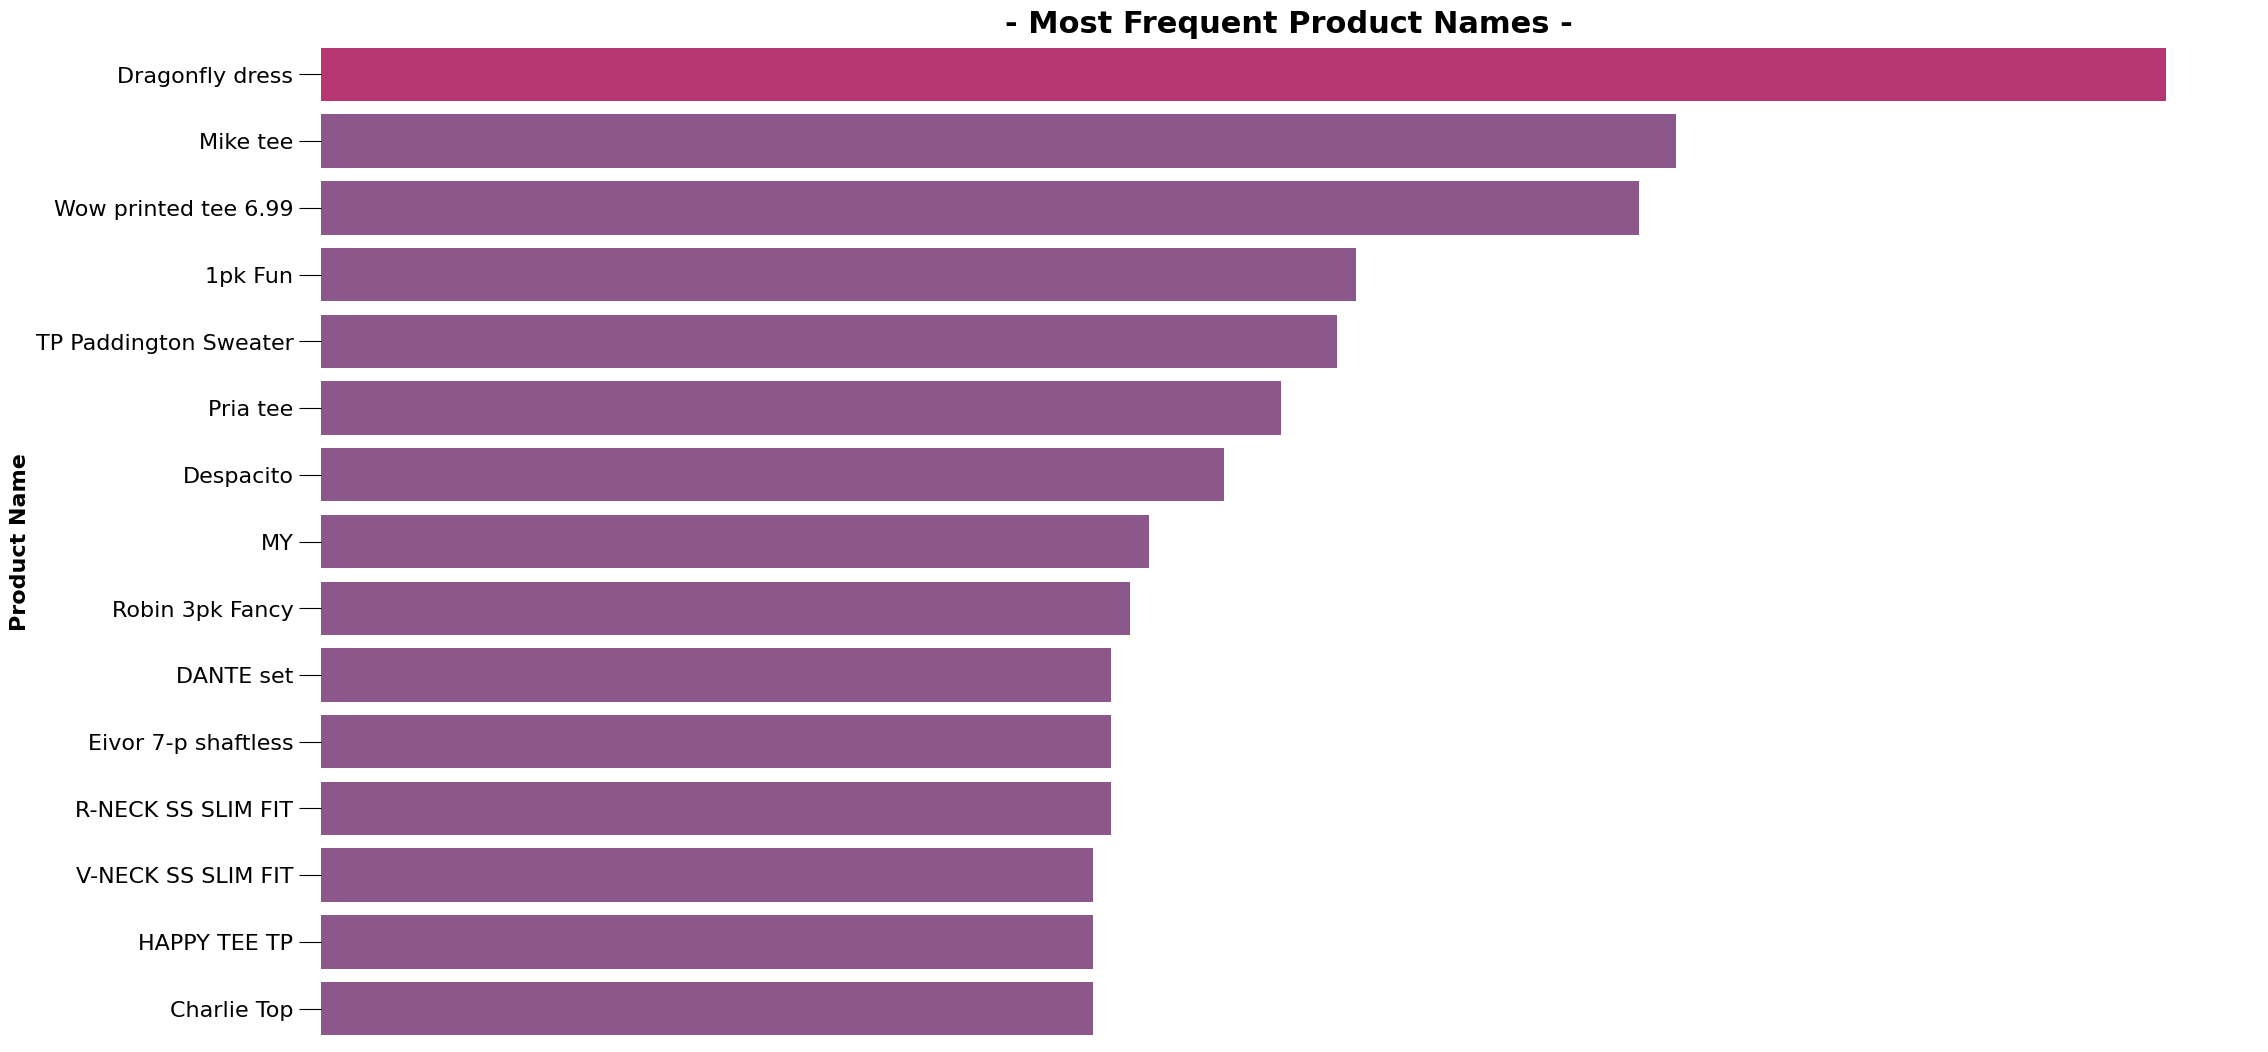

<Figure size 640x480 with 0 Axes>

In [59]:
clrs = ["#CB2170" if x==max(prod_name["prod_name"]) else '#954E93' for x in prod_name["prod_name"]]

# Get images
prod_name_images = articles[articles["prod_name"].isin(prod_name["index"].tolist())].groupby("prod_name")["path"].first().reset_index()
image_paths = prod_name_images["path"].tolist()
image_names = prod_name_images["prod_name"].tolist()

# Plot
fig, ax = plt.subplots(figsize=(25, 13))
plt.title('- Most Frequent Product Names -', size=22, weight="bold")

sns.barplot(data=prod_name, x="prod_name", y="index", ax=ax,
            palette=clrs)
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
#plt.imshow(bk_image, zorder=0, extent=[x0, x1, y0, y1], alpha=0.35, aspect='auto')

#show_values_on_bars(axs=ax, h_v="h", space=0.4)
plt.ylabel("Product Name", size = 16, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)
plt.tick_params(size=16)

#insert_image(path='/kaggle/input/h-and-m-personalized-fashion-recommendations/images/067/0677885001.jpg', zoom=0.45, xybox=(92, 11), ax=ax)

sns.despine(left=True, bottom=True)
plt.show();

print("\n")


plt.tight_layout()
plt.show()

In [60]:
### total unique products

In [61]:
total_prod_names

45875

In [62]:
#Dragonfly dress
dragonfly_article_id = articles['article_id'][articles['prod_name'] == 'Dragonfly dress']
dragonfly_article_id


43652    677885001
43653    677885002
43654    677885004
43655    677885006
43656    677885007
           ...    
96510    870530007
96511    870530008
96513    870530010
96515    870530012
96519    870530028
Name: article_id, Length: 98, dtype: int64

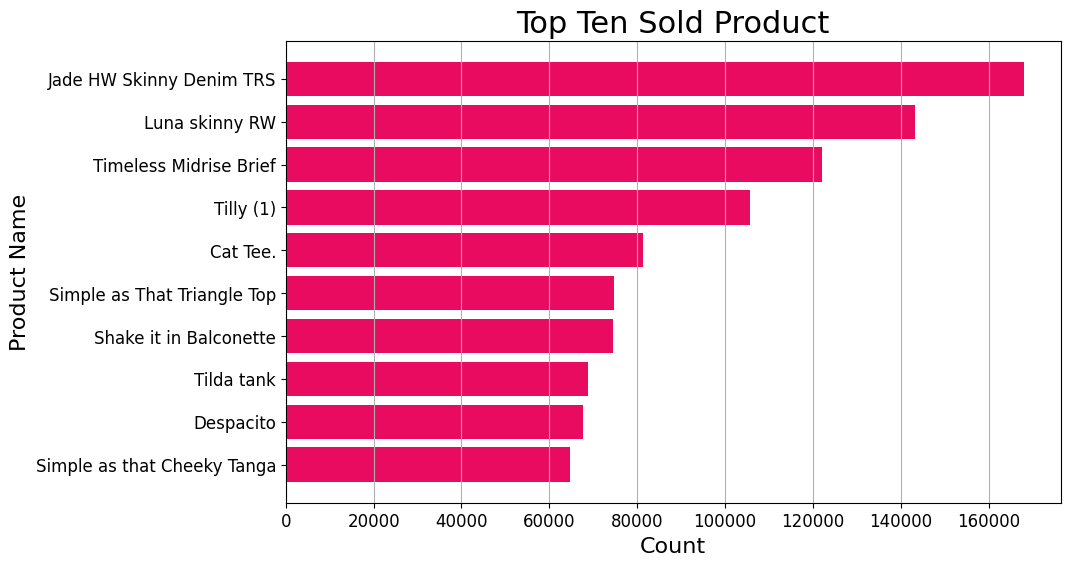

In [83]:
# Get the top ten sold product names
top_ten_products = top_sold_products.nlargest(10, "count")
top_ten_products = top_ten_products.sort_values("count")

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_ten_products["prod_name"], top_ten_products["count"], color="#E90B60")
plt.title('Top Ten Sold Product', size=22)
plt.xlabel("Count", size=16)
plt.ylabel("Product Name", size=16)
plt.xticks(size=12)
ax1.tick_params(axis='y',  labelsize=12)
plt.yticks(size=12)
plt.grid(axis="x")


#ax1.set_xlabel('Count', fontsize=16)
#ax1.set_ylabel('Product Name', fontsize=16)
#ax1.set_title('Top Products by Availability', fontsize=18)
#ax1.tick_params(axis='y', labelrotation=0, labelsize=12)
plt.show()


In [69]:
top_sold_products.head()

,article_id,count,prod_name
0,706016001,50287,Jade HW Skinny Denim TRS
1,706016002,35043,Jade HW Skinny Denim TRS
2,372860001,31718,7p Basic Shaftless
3,610776002,30199,Tilly (1)
4,759871002,26329,Tilda tank


In [ ]:
print(articles["path"][:2])
print (image_paths)

In [ ]:
/kaggle/input/h-and-m-personalized-fashion-recommendations/images/015/0156231002.jpg
/kaggle/input/h-and-m-personalized-fashion-recommendations/images156231/156231001.jpg

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
customers.head()

In [ ]:
# Get data
top_value_customers = transactions["customer_id"].value_counts().reset_index().head(10)
top_value_customers.columns = ["customer_id", "count"]
top_value_customers = pd.merge(top_sold_products, customers, on="customer_id")[["customer_id", "count", "age"]]

clrs = ["#E90B60" if x==max(top_sold_products["count"]) else '#AF0848' for x in top_sold_products["count"]]



# Plot
fig, ax = plt.subplots(figsize=(25, 13))
plt.title(' Customers that buy the most  -', size=22, weight="bold")

sns.barplot(data=top_value_customers, x="count", y="Customer ID", ax=ax,
            palette=clrs)
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
#plt.imshow(bk_image, zorder=0, extent=[x0, x1, y0, y1], alpha=0.35, aspect='auto')

#show_values_on_bars(axs=ax, h_v="h", space=0.4)
plt.ylabel("Customer Name", size = 16, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)
plt.tick_params(size=16)


sns.despine(left=True, bottom=True)
plt.show();



In [ ]:
top_value_customers

In [ ]:
# Get data
# Get data
purchase_count_customers = transactions["customer_id"].value_counts().reset_index()
purchase_count_customers.columns = ["customer_id", "count"]
purchase_count_customers = pd.merge(purchase_count_customers, customers, on="customer_id")[["customer_id", "count", "age"]]



top_value_customers = transactions["customer_id"].value_counts().reset_index().head(10)
top_value_customers.columns = ["customer_id", "count"]
top_value_customers_age = pd.merge(top_value_customers, customers, on="customer_id")[["customer_id", "count", "age"]]

clrs = ["#E90B60" if x==max(top_value_customers["count"]) else '#AF0848' for x in top_value_customers["count"]]

# Plot
fig, ax = plt.subplots(figsize=(25, 13))
plt.title('Customers that buy the most', size=22, weight="bold")

sns.barplot(data=top_value_customers, x="count", y="customer_id", ax=ax, palette=clrs)
plt.ylabel("Customer ID", size=16, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)
plt.tick_params(size=16)

In [ ]:
# Group by age and calculate the sum of counts
age_group_counts = top_value_customers.groupby("age")["count"].sum().reset_index()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Count of Top Value Customers by Age Group', size=16, weight="bold")

sns.barplot(data=age_group_counts, x="age", y="count", ax=ax)
plt.xlabel("Age Group", size=14, weight="bold")
plt.ylabel("Count", size=14, weight="bold")
plt.xticks(rotation=45)
plt.yticks(size=12)
plt.tick_params(size=12)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get data
purchase_count_customers = transactions["customer_id"].value_counts().reset_index()
purchase_count_customers.columns = ["customer_id", "count"]
purchase_count_customers = pd.merge(purchase_count_customers, customers, on="customer_id")[["customer_id", "count", "age"]]

# Define age group ranges
age_groups = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Assign customers to age groups
purchase_count_customers["age_group"] = pd.cut(purchase_count_customers["age"], age_groups)

# Calculate sum of counts for each age group
age_group_counts = purchase_count_customers.groupby("age_group")["count"].sum().reset_index()

# Convert age_group column to string labels
age_group_counts["age_group"] = age_group_counts["age_group"].astype(str)

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(age_group_counts["age_group"], age_group_counts["count"], color="#E90B60")
plt.title('Sum of Counts by Age Group', size=16, weight="bold")
plt.xlabel("Age Group", size=14, weight="bold")
plt.ylabel("Sum of Counts", size=14, weight="bold")
plt.xticks(rotation=45)
plt.yticks(size=12)
plt.grid(axis="y")

plt.show()


In [ ]:
transactions.info()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get data
purchase_count_customers = transactions["price"].value_counts().reset_index()
purchase_count_customers.columns = ["price", "count"]
purchase_count_customers["price"] = purchase_count_customers["price"] *1000
#purchase_count_customers = pd.merge(purchase_count_customers, customers, on="customer_id")[["price", "count"]]

# Define price group ranges
price_groups = [0,5,10, 50, 100,150,200,250,500,1000, 5000, float('inf')]

# Assign customers to price groups
purchase_count_customers["price_group"] = pd.cut(purchase_count_customers["price"], price_groups)

# Calculate sum of counts for each price group
price_group_counts = purchase_count_customers.groupby("price_group")["count"].sum().reset_index()

# Convert price_group column to string labels
price_group_counts["price_group"] = price_group_counts["price_group"].astype(str)

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(price_group_counts["price_group"], price_group_counts["count"], color="#E90B60")
plt.title('Sum of Counts by Price Group', size=16, weight="bold")
plt.xlabel("Price Group", size=14, weight="bold")
plt.ylabel("Sum of Counts", size=14, weight="bold")
plt.xticks(rotation=45)
plt.yticks(size=12)
plt.grid(axis="y")

plt.show()


In [ ]:
price_group_counts

In [ ]:
max(transactions["price"]) *1000

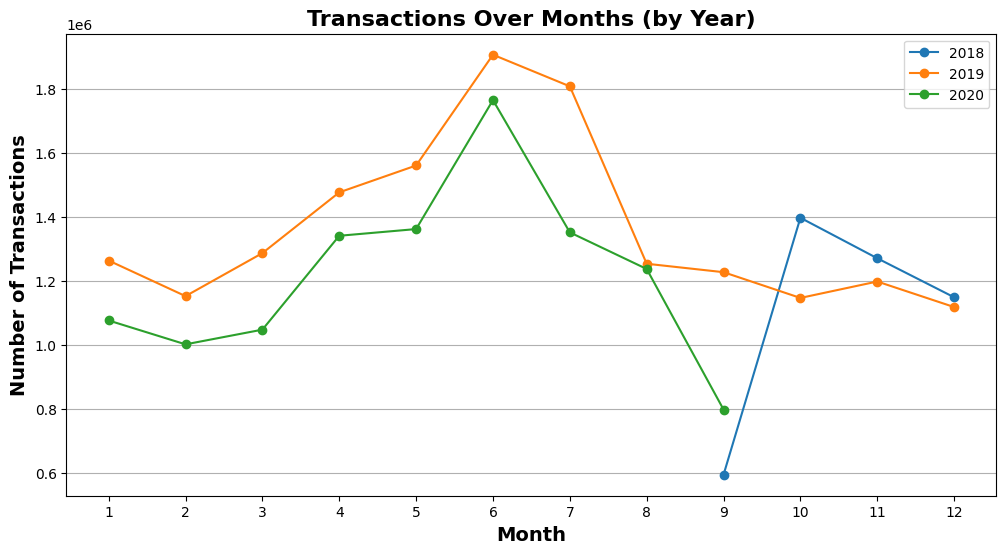

In [84]:

# Convert "t_dat" column to datetime
transactions["t_dat"] = pd.to_datetime(transactions["t_dat"])

# Extract year and month from the "t_dat" column
transactions["year"] = transactions["t_dat"].dt.year
transactions["month"] = transactions["t_dat"].dt.month

# Group transactions by year and month and count the number of transactions
transactions_per_year_month = transactions.groupby(["year", "month"]).size()

# Plot trend lines for different years
plt.figure(figsize=(12, 6))
for year in transactions["year"].unique():
    transactions_per_year = transactions_per_year_month.loc[year]
    transactions_per_year.plot(kind="line", marker="o", label=str(year))

plt.title("Transactions Over Months (by Year)", size=16, weight="bold")
plt.xlabel("Month", size=14, weight="bold")
plt.ylabel("Number of Transactions", size=14, weight="bold")
plt.xticks(range(1, 13))
plt.legend()
plt.grid(axis="y")
plt.show()


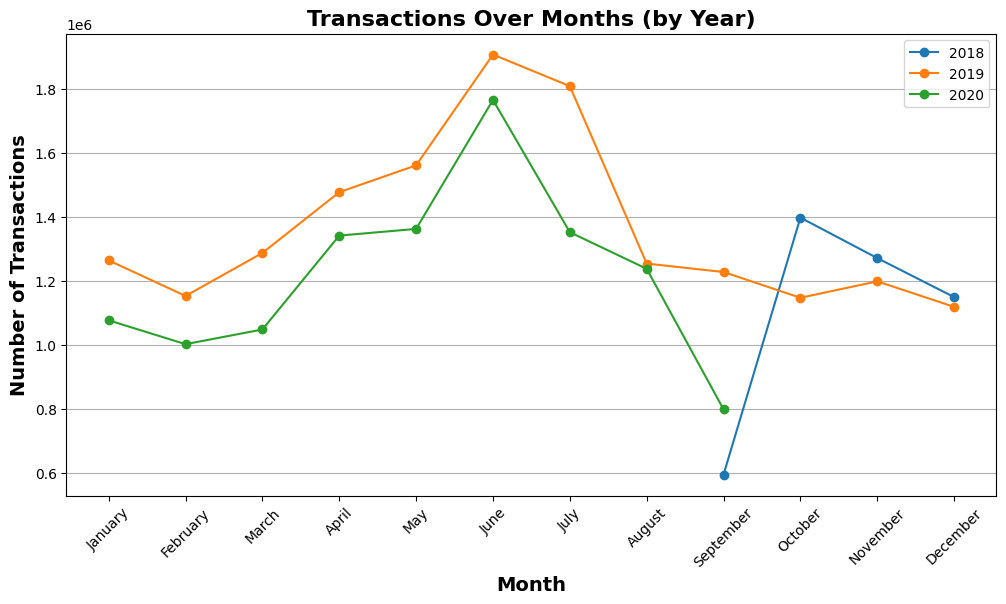

In [85]:
import calendar
transactions["t_dat"] = pd.to_datetime(transactions["t_dat"])

# Extract year and month from the "t_dat" column
transactions["year"] = transactions["t_dat"].dt.year
transactions["month"] = transactions["t_dat"].dt.month

# Group transactions by year and month and count the number of transactions
transactions_per_year_month = transactions.groupby(["year", "month"]).size()

# Plot trend lines for different years
plt.figure(figsize=(12, 6))
for year in transactions["year"].unique():
    transactions_per_year = transactions_per_year_month.loc[year]
    month_names = [calendar.month_name[month] for month in transactions_per_year.index.get_level_values("month")]
    transactions_per_year.plot(kind="line", marker="o", label=str(year))
    
plt.title("Transactions Over Months (by Year)", size=16, weight="bold")
plt.xlabel("Month", size=14, weight="bold")
plt.ylabel("Number of Transactions", size=14, weight="bold")
plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)
plt.legend()
plt.grid(axis="y")
plt.show()

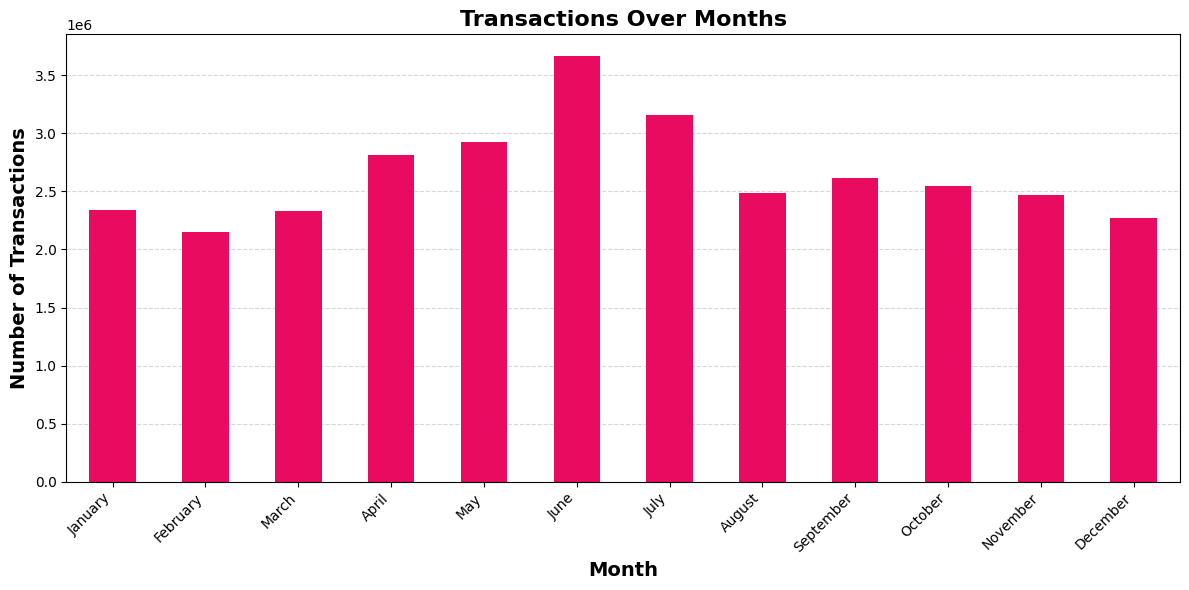

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Convert "t_dat" column to datetime
transactions["t_dat"] = pd.to_datetime(transactions["t_dat"])

# Extract month from the "t_dat" column
transactions["month"] = transactions["t_dat"].dt.month

# Group transactions by month and count the number of transactions
transactions_per_month = transactions.groupby("month").size()

# Plot a bar chart
plt.figure(figsize=(12, 6))
transactions_per_month.plot(kind="bar", color="#E90B60", zorder=2)

plt.title("Transactions Over Months", size=16, weight="bold")
plt.xlabel("Month", size=14, weight="bold")
plt.ylabel("Number of Transactions", size=14, weight="bold")
plt.xticks(range(0, 12), calendar.month_name[1:13], rotation= 45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5, zorder=1)
plt.gca().set_axisbelow(True)  # Ensure that grid lines are behind the bars
plt.tight_layout()  # Adjust spacing of plot elements
plt.show()
